In [1]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
def strength_centrality(G, out=True): 
    strengths = dict()
    sum_of_weights = 0
    for node in G.nodes:
        strengths[node] = 0
    for u, v, d in G.edges(data=True):
        if not out: #se non è out scambio i nodi
            k = v
            v = u
            u = k
        strengths[u] += d["weight"]
        sum_of_weights += d["weight"]
    
    for key in strengths.keys():
        strengths[key] = strengths[key] / sum_of_weights
        
    return dict(sorted(strengths.items(), key=lambda item: item[1], reverse=True)) 
        

In [3]:
Threshold = 1
path_dataset = "DatasetWithCountries.xlsx"

df = pd.read_excel(path_dataset)
df = df[df["Value (thousands USD)"] > Threshold]
df['ContinentExporter'] = df['ContinentExporter'].fillna("NA")
df['ContinentImporter'] = df['ContinentImporter'].fillna("NA")

# Coal

In [4]:
df_coal = df[df["Product"] == "Coal"]
df_coal.head()

,Exporter,Importer,Product,Value (thousands USD),ContinentExporter,ContinentImporter
5,ALB,SRB,Coal,33.708,EU,EU
87,AZE,GEO,Coal,43.500,AS,AS
118,ARG,BRA,Coal,229.782,SA,SA
123,ARG,CHL,Coal,1022.578,SA,SA
130,ARG,PRY,Coal,56.766,SA,SA


### Find Nodes and Edges

In [5]:
coal_nodes = list(set(df_coal["Exporter"].unique().tolist() + df_coal["Importer"].unique().tolist()))

continent_mapping = {}
for (index, row) in df_coal.iterrows():
    continent_mapping[row["Exporter"]] = row["ContinentExporter"]
    continent_mapping[row["Importer"]] = row["ContinentImporter"]

coal_edges = [(row["Exporter"], row["Importer"], row["Value (thousands USD)"]) for (index, row) in df_coal.iterrows()]


## Create Graph

In [6]:
G_coal = nx.DiGraph()

G_coal.add_nodes_from(coal_nodes)
for node in G_coal.nodes():
    G_coal.nodes[node]["Continent"] = continent_mapping[node]

G_coal.add_weighted_edges_from(coal_edges)

inverse_weights = {}
for u, v, d in G_coal.edges(data=True):
    inverse_weights[(u,v)] = math.log(d["weight"]+1)
    
nx.set_edge_attributes(G_coal, inverse_weights, name="inverse_weights")


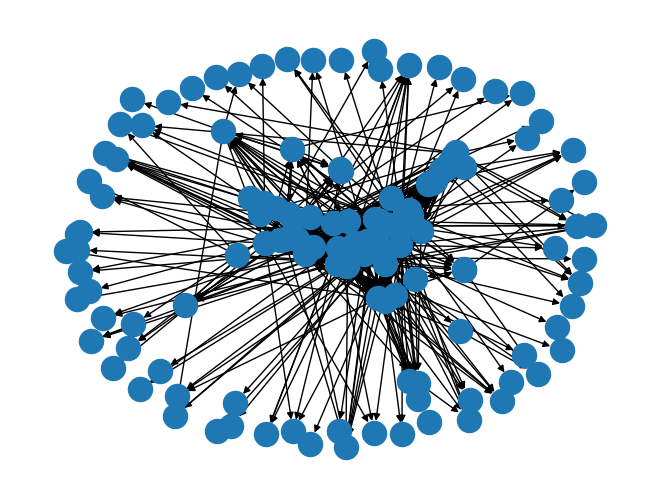

In [7]:
nx.draw(G_coal)

## Degree centrality

In [8]:
sorted(nx.out_degree_centrality(G_coal).items(), key=lambda item: item[1], reverse=True)

[('CHN', 0.43478260869565216),
 ('POL', 0.37681159420289856),
 ('DEU', 0.32608695652173914),
 ('RUS', 0.2898550724637681),
 ('USA', 0.2463768115942029),
 ('ITA', 0.2391304347826087),
 ('CZE', 0.2246376811594203),
 ('COL', 0.2246376811594203),
 ('ESP', 0.21014492753623187),
 ('GBR', 0.18115942028985507),
 ('BEL', 0.13043478260869565),
 ('NLD', 0.12318840579710146),
 ('LBN', 0.10144927536231885),
 ('HUN', 0.10144927536231885),
 ('JPN', 0.10144927536231885),
 ('ZAF', 0.10144927536231885),
 ('IND', 0.09420289855072464),
 ('FIN', 0.07246376811594203),
 ('AUT', 0.06521739130434782),
 ('FRA', 0.06521739130434782),
 ('TUR', 0.057971014492753624),
 ('DNK', 0.057971014492753624),
 ('AUS', 0.057971014492753624),
 ('IDN', 0.050724637681159424),
 ('ARE', 0.050724637681159424),
 ('BIH', 0.050724637681159424),
 ('SWE', 0.043478260869565216),
 ('KAZ', 0.043478260869565216),
 ('UKR', 0.043478260869565216),
 ('ROU', 0.043478260869565216),
 ('CAN', 0.036231884057971016),
 ('BGR', 0.036231884057971016),
 

In [9]:
sorted(nx.in_degree_centrality(G_coal).items(), key=lambda item: item[1], reverse=True)

[('IND', 0.18115942028985507),
 ('NLD', 0.13768115942028986),
 ('DEU', 0.13768115942028986),
 ('FRA', 0.13768115942028986),
 ('GBR', 0.13043478260869565),
 ('ESP', 0.12318840579710146),
 ('BEL', 0.11594202898550725),
 ('CHN', 0.11594202898550725),
 ('MYS', 0.10869565217391304),
 ('USA', 0.09420289855072464),
 ('TUR', 0.08695652173913043),
 ('AUT', 0.08695652173913043),
 ('IDN', 0.07971014492753624),
 ('SWE', 0.07971014492753624),
 ('CHE', 0.07971014492753624),
 ('POL', 0.07971014492753624),
 ('SVK', 0.07971014492753624),
 ('JPN', 0.07971014492753624),
 ('BGR', 0.07971014492753624),
 ('ITA', 0.07971014492753624),
 ('NOR', 0.07246376811594203),
 ('ROU', 0.07246376811594203),
 ('KOR', 0.06521739130434782),
 ('SRB', 0.06521739130434782),
 ('MAR', 0.06521739130434782),
 ('MEX', 0.057971014492753624),
 ('PAK', 0.057971014492753624),
 ('CAN', 0.057971014492753624),
 ('RUS', 0.057971014492753624),
 ('HUN', 0.057971014492753624),
 ('VNM', 0.057971014492753624),
 ('FIN', 0.057971014492753624),
 

### out_strength_centrality

In [10]:
out_strengths_centrality = strength_centrality(G_coal, out=True)
print(out_strengths_centrality)

{'POL': 0.2509419070913881, 'CHN': 0.14567359952310233, 'JPN': 0.11677536622331758, 'COL': 0.11658506686042955, 'RUS': 0.10397322368306129, 'DEU': 0.045706670047727306, 'USA': 0.03313399442750499, 'CZE': 0.0286455747941815, 'AUS': 0.02316162930070879, 'BIH': 0.016555099515807182, 'ITA': 0.015985029627646218, 'NLD': 0.014336125081390332, 'IDN': 0.012009723130542951, 'HUN': 0.008848657629880696, 'CHE': 0.006883286398070347, 'KOR': 0.006369809971995102, 'MOZ': 0.006196619285115745, 'ESP': 0.005858969413654274, 'CHL': 0.004667710793851061, 'IND': 0.0043063626666575245, 'ZWE': 0.0039010813793359557, 'CAN': 0.0034357486553541145, 'NZL': 0.003390383305176053, 'BEL': 0.003211244127774809, 'ZAF': 0.0030266057778913992, 'SGP': 0.002734596367573674, 'FIN': 0.001995685054946566, 'UKR': 0.0015599885029209737, 'GBR': 0.0014130330070956862, 'HKG': 0.0013852197365283544, 'ROU': 0.0010643362205905984, 'EGY': 0.0008646674922607553, 'SWE': 0.0008099619903786362, 'FRA': 0.0006390107246824984, 'IRN': 0.000

### in_strength_centrality

In [11]:
in_strengths_centrality = strength_centrality(G_coal, out=False)
print(in_strengths_centrality)

{'IND': 0.11271719056813762, 'CHN': 0.10744773538386783, 'DEU': 0.06543009172080234, 'BRA': 0.052438873030909376, 'MYS': 0.04713963775669938, 'GBR': 0.045170416584397896, 'ESP': 0.042935437860793554, 'KAZ': 0.04199981934009523, 'VNM': 0.03782535741616422, 'MEX': 0.03580367034238923, 'IDN': 0.03178950598960502, 'ROU': 0.02976986782042919, 'CAN': 0.028094993515914147, 'AUT': 0.027725245632610654, 'FRA': 0.026814976929565432, 'ITA': 0.022890967067525175, 'SRB': 0.02030411389134303, 'JPN': 0.02004300992715679, 'BEL': 0.017905579458321406, 'TUR': 0.015717180157651826, 'NOR': 0.015019321494768064, 'UKR': 0.014939416366105313, 'KOR': 0.01186660915161571, 'AUS': 0.010671167590556384, 'CZE': 0.010550177372355642, 'DZA': 0.00970038612471038, 'NLD': 0.008181620356422939, 'POL': 0.007914082738598123, 'FIN': 0.007843549126081775, 'USA': 0.007647200189554791, 'SVK': 0.007041916635462246, 'SWE': 0.0047432505298159585, 'PAK': 0.00449779796003452, 'RUS': 0.004332518281640738, 'ZAF': 0.0041897523584108,

## Closeness centrality

In [12]:
sorted(nx.closeness_centrality(G_coal, distance="inverse_weights").items(), key=lambda item: item[1], reverse=True)

[('NLD', 0.07139699802305303),
 ('SGP', 0.06682238574677327),
 ('TUR', 0.06389358855383666),
 ('CHE', 0.06231795756799982),
 ('BGR', 0.06209099601316599),
 ('CRI', 0.05955313841078842),
 ('IND', 0.05919489194857846),
 ('ROU', 0.058053546589702056),
 ('BGD', 0.056727425905378374),
 ('ISR', 0.05615977738130137),
 ('JPN', 0.05605149133588795),
 ('GBR', 0.05590438704289993),
 ('ESP', 0.05562168840844325),
 ('KEN', 0.05554320480759921),
 ('FRA', 0.055490189185819834),
 ('PAK', 0.055352304652104355),
 ('CHN', 0.05458381805632818),
 ('GTM', 0.05452574045047849),
 ('MDA', 0.05439945512855523),
 ('GEO', 0.05394371199018778),
 ('AUS', 0.053547983704715196),
 ('DEU', 0.05313629655633194),
 ('USA', 0.052699154712475854),
 ('ISL', 0.052498656127946075),
 ('POL', 0.05226260193717346),
 ('RUS', 0.052168043250186535),
 ('ALB', 0.050790989072230085),
 ('HUN', 0.050586186407475156),
 ('GRC', 0.05043752527569516),
 ('ARE', 0.05012891046542961),
 ('MLI', 0.05005386416193786),
 ('LBN', 0.050019914638296456

## Betweeness Centrality

In [13]:
sorted(nx.betweenness_centrality(G_coal, weight="inverse_weights").items(), key=lambda item: item[1], reverse=True)

[('CHN', 0.10800803977573256),
 ('USA', 0.0804506505871152),
 ('DEU', 0.06923727917063366),
 ('NLD', 0.06786205437427272),
 ('IND', 0.0633661271554004),
 ('BEL', 0.05696604252618216),
 ('GBR', 0.0535808737966783),
 ('TUR', 0.050037025282978945),
 ('LBN', 0.04845022744102401),
 ('ESP', 0.047339468951655556),
 ('BGR', 0.04681053633767058),
 ('POL', 0.046175817200888605),
 ('RUS', 0.0316830635777002),
 ('ROU', 0.027610282450015865),
 ('THA', 0.024912726118692476),
 ('AUT', 0.022955675446948057),
 ('AUS', 0.022320956310166083),
 ('HUN', 0.021527557389188615),
 ('ZAF', 0.018618428012271235),
 ('JPN', 0.017454776261504282),
 ('SRB', 0.01655559081772982),
 ('DNK', 0.015867978419549348),
 ('FRA', 0.01512747275997038),
 ('SWE', 0.014545646884586903),
 ('CHL', 0.013752247963609436),
 ('LUX', 0.012377023167248492),
 ('ITA', 0.010578652279699566),
 ('ARG', 0.010419972495504071),
 ('COL', 0.007669522902782185),
 ('ALB', 0.0074050565957896955),
 ('PRT', 0.0074050565957896955),
 ('ARE', 0.00640008462

## Pagerank

In [14]:
sorted(nx.pagerank(G_coal, weight="weight").items(), key=lambda item: item[1], reverse=True)

[('FRA', 0.04891677435275396),
 ('ITA', 0.04515707558003389),
 ('IND', 0.040839532874806225),
 ('BTN', 0.03215332279365746),
 ('CHN', 0.03159626204567659),
 ('ESP', 0.02878659125634434),
 ('GEO', 0.027212267453544846),
 ('AZE', 0.02629914706735601),
 ('IDN', 0.025110236828657095),
 ('DEU', 0.022233415235011766),
 ('SRB', 0.019843245648172744),
 ('USA', 0.017862433037609784),
 ('GBR', 0.017733292583866158),
 ('BEL', 0.0176349674199275),
 ('CAN', 0.017410038827522976),
 ('GTM', 0.01695409712950906),
 ('HUN', 0.015970468168267346),
 ('TUR', 0.014893475831519148),
 ('MYS', 0.014878171750375454),
 ('AUT', 0.014284893794432907),
 ('HND', 0.01381046267298872),
 ('ALB', 0.01338593925571051),
 ('MEX', 0.01173870570700175),
 ('MNE', 0.010956448338518764),
 ('ARG', 0.010540783194309069),
 ('SYR', 0.010086217512411476),
 ('VNM', 0.009882337550456173),
 ('FIN', 0.009836675807003429),
 ('BRA', 0.009242627624659399),
 ('CHL', 0.009193437143735701),
 ('NOR', 0.007468417386852644),
 ('NLD', 0.007102469

## Assortative mixing

In [15]:
nx.attribute_assortativity_coefficient(G_coal, attribute="Continent")

0.3533672612283215

## Assortativity by degree

In [16]:
nx.degree_assortativity_coefficient(G_coal)

-0.16773270467236764

## Core-Periphery

In [17]:
import cpnet

algorithm = cpnet.LapCore()
algorithm.detect(G_coal)

groups = algorithm.get_pair_id()
coreness = algorithm.get_coreness()

print("Groups")
#print([(c, groups[c]) for c in groups.keys() if groups[c]!=0])
print(groups)
print()
print("Coreness=1")
print([(c, coreness[c]) for c in coreness.keys() if coreness[c]==1])
print("Coreness=0")
print([(c, coreness[c]) for c in coreness.keys() if coreness[c]==0])

Groups
{'UZB': 0, 'GMB': 0, 'HND': 0, 'BTN': 0, 'NAM': 0, 'GHA': 0, 'SLE': 0, 'KOR': 0, 'BEL': 0, 'MNG': 0, 'IRN': 0, 'NZL': 0, 'SGP': 0, 'VEN': 0, 'PER': 0, 'CRI': 0, 'LBN': 0, 'NLD': 0, 'ISL': 0, 'KWT': 0, 'HRV': 0, 'KGZ': 0, 'SDN': 0, 'ARM': 0, 'BWA': 0, 'SVN': 0, 'LBR': 0, 'GTM': 0, 'MEX': 0, 'SYR': 0, 'GAB': 0, 'JOR': 0, 'PAK': 0, 'BMU': 0, 'AZE': 0, 'FJI': 0, 'CAN': 0, 'SRB': 0, 'MYS': 0, 'SUR': 0, 'LUX': 0, 'URY': 0, 'PHL': 0, 'NOR': 0, 'ZMB': 0, 'GRL': 0, 'IDN': 0, 'CZE': 0, 'LAO': 0, 'NGA': 0, 'QAT': 0, 'GRC': 0, 'MWI': 0, 'ECU': 0, 'DEU': 0, 'ARG': 0, 'SEN': 0, 'GBR': 0, 'MLI': 0, 'SWE': 0, 'PRY': 0, 'CIV': 0, 'PRK': 0, 'COL': 0, 'RUS': 0, 'BRA': 0, 'CHE': 0, 'ISR': 0, 'ARE': 0, 'IRQ': 0, 'GIN': 0, 'TUR': 0, 'KEN': 0, 'GUY': 0, 'HUN': 0, 'MKD': 0, 'POL': 0, 'MNE': 0, 'CHL': 0, 'LKA': 0, 'LTU': 0, 'BRN': 0, 'COG': 0, 'MDG': 0, 'USA': 0, 'TJK': 0, 'MAR': 0, 'HKG': 0, 'DOM': 0, 'BGD': 0, 'KAZ': 0, 'AND': 0, 'SLV': 0, 'IRL': 0, 'COD': 0, 'PAN': 0, 'UKR': 0, 'AGO': 0, 'VNM': 0, 'F

C:\Users\franc\anaconda3\envs\SocialNetworkAnalysis\lib\site-packages\cpnet\utils.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  sparse.csr_matrix(nx.adjacency_matrix(net), dtype=np.float64),


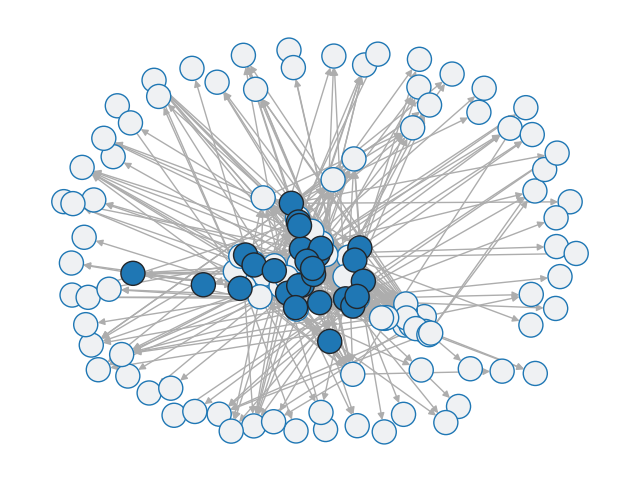

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G_coal, groups, coreness, ax)

# New graph with total flow in USD 

In [19]:
df_total = df.groupby(['Exporter','Importer'])['Value (thousands USD)'].sum().reset_index()
df_total

,Exporter,Importer,Value (thousands USD)
0,ABW,KOR,7.491343e+04
1,AGO,BEL,2.296520e+02
2,AGO,BRA,3.059060e+04
3,AGO,CHL,6.786450e+04
4,AGO,CHN,1.260183e+07
...,...,...,...
1932,ZWE,MWI,3.417301e+03
1933,ZWE,NAM,5.086895e+03
1934,ZWE,SWZ,8.320575e+03
1935,ZWE,ZAF,9.598700e+03


In [23]:
totalUSD_nodes = list(set(df_total["Exporter"].unique().tolist() + df_total["Importer"].unique().tolist()))

totalUSD_edges = [(row["Exporter"], row["Importer"], row["Value (thousands USD)"]) for (index, row) in df_total.iterrows()]

## Create Total Graph

In [24]:
G_total = nx.DiGraph()

G_total.add_nodes_from(totalUSD_nodes)

G_total.add_weighted_edges_from(totalUSD_edges)

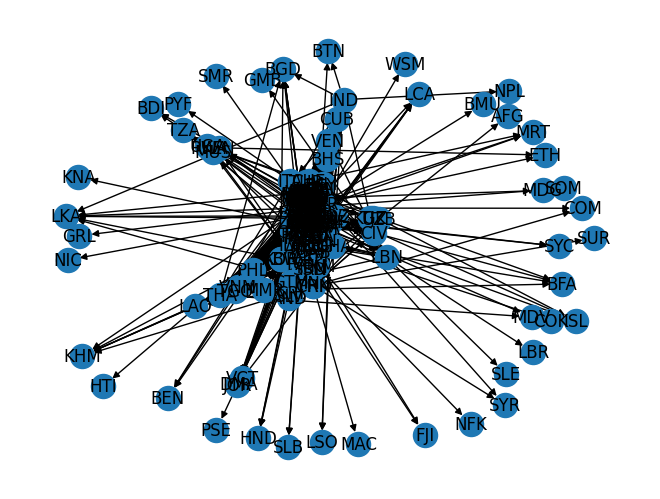

In [27]:
nx.draw_networkx(G_total,with_labels=True)

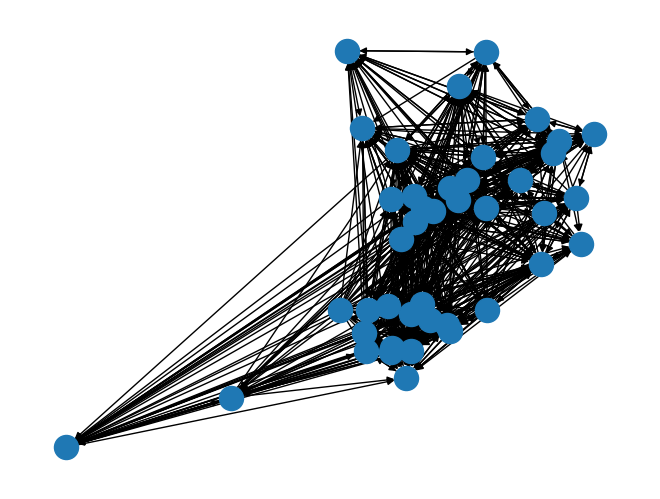

In [26]:
nx.draw(nx.k_core(G_total))

## Clustering coefficient for each node (local)

In [34]:
sorted(nx.clustering(G_total).items(), key=lambda item: item[1], reverse=True)

[('MNG', 1.0),
 ('ISL', 1.0),
 ('FJI', 1.0),
 ('COM', 1.0),
 ('TJK', 1.0),
 ('SLB', 1.0),
 ('MDV', 1.0),
 ('LSO', 1.0),
 ('MDA', 1.0),
 ('KGZ', 0.8888888888888888),
 ('TCD', 0.85),
 ('HND', 0.8333333333333334),
 ('ABW', 0.8333333333333334),
 ('SEN', 0.8333333333333334),
 ('SWZ', 0.8333333333333334),
 ('LAO', 0.8157894736842105),
 ('BGD', 0.8095238095238095),
 ('GIB', 0.7857142857142857),
 ('PNG', 0.7735849056603774),
 ('LKA', 0.7619047619047619),
 ('BHR', 0.75),
 ('ALB', 0.7397260273972602),
 ('BWA', 0.7368421052631579),
 ('MMR', 0.7352941176470589),
 ('OMN', 0.7109375),
 ('SDN', 0.7),
 ('KHM', 0.7),
 ('HKG', 0.6944444444444444),
 ('MAR', 0.6851851851851852),
 ('LUX', 0.6826086956521739),
 ('LVA', 0.6756756756756757),
 ('MHL', 0.6666666666666666),
 ('NER', 0.6666666666666666),
 ('MNE', 0.6598639455782312),
 ('BIH', 0.6584821428571429),
 ('TUN', 0.6508620689655172),
 ('CUB', 0.65),
 ('MKD', 0.645320197044335),
 ('ISR', 0.6388888888888888),
 ('MWI', 0.6346153846153846),
 ('KWT', 0.620614

## Average Clustering coefficient

In [35]:
nx.average_clustering(G_total)

0.4317025047524886

## Transitivity

In [29]:
nx.transitivity(G_total)

0.28595563390627293

## Reciprocity on the whole network

In [41]:
nx.reciprocity(G_total)

0.4212700051626226